In [4]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

In [5]:
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

In [6]:
math = pd.read_csv('stud_math.csv')

The aim of the project is to conduct exploration analysis of the provided data, bringing the data to a state suitable for building a model about the impact of student living conditions on math performance.

## 1. Primary data review

In [7]:
math.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


In [8]:
math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_gr', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [9]:
math.head(3)

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


In [10]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   famsize       368 non-null    object 
 5   p_status      350 non-null    object 
 6   m_edu         392 non-null    float64
 7   f_edu         371 non-null    float64
 8   m_job         376 non-null    object 
 9   f_job         359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  traveltime    367 non-null    float64
 13  studytime     388 non-null    float64
 14  failures      373 non-null    float64
 15  schoolsup     386 non-null    object 
 16  famsup        356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

The data has 30 columns, 12 of which are of type "float64", 1 is of type "int64", and 17 are of type "object".
Nan values are present.

# 1.1. Functions

In [11]:
def primary_analysis(x):
    math[x] = math[x].apply(lambda x: None if x == '' else None if pd.isnull(x) else None if x == 'nan' 
                            else None if x == 'NaN'  else None if x == 'Nan'
                            else x)
    a = math[x].value_counts()
    b = math.loc[:, [x]].info()
    c = math[x].unique()
    d = math[x].describe()
    e = sns.countplot(x=x,data=math)
    return a, b, c, d

def primary_analysis_num(x):
    math[x] = math[x].apply(lambda x: None if x == '' else None if pd.isnull(x) else None if x == 'nan' 
                            else None if x == 'NaN'  else None if x == 'Nan' else x)
    a = math[x].value_counts()
    b = math.loc[:, [x]].info()
    c = math[x].unique()
    d = math[x].describe()
    return a, b, c, d

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): #  Multiple comparisons (Bonferroni correction)
            print('Найдены статистически значимые различия для колонки', column)
            break

# 2. Primary analysis of data in columns

# 2.1. math.school

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(GP    349
 MS     46
 Name: school, dtype: int64,
 None,
 array(['GP', 'MS'], dtype=object),
 count     395
 unique      2
 top        GP
 freq      349
 Name: school, dtype: object)

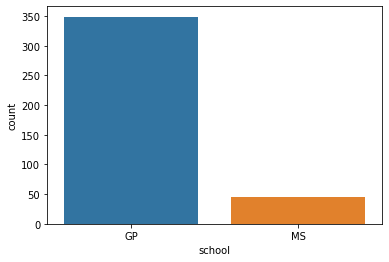

In [12]:
primary_analysis('school')

# 2.2. math.sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(F    208
 M    187
 Name: sex, dtype: int64,
 None,
 array(['F', 'M'], dtype=object),
 count     395
 unique      2
 top         F
 freq      208
 Name: sex, dtype: object)

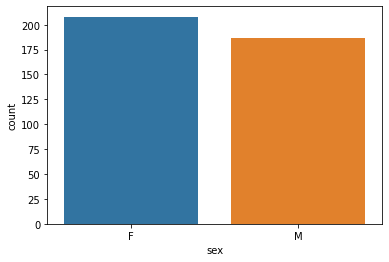

In [13]:
primary_analysis('sex')

# 2.3. math.age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


(16    104
 17     98
 18     82
 15     82
 19     24
 20      3
 22      1
 21      1
 Name: age, dtype: int64,
 None,
 array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64),
 count    395.000000
 mean      16.696203
 std        1.276043
 min       15.000000
 25%       16.000000
 50%       17.000000
 75%       18.000000
 max       22.000000
 Name: age, dtype: float64)

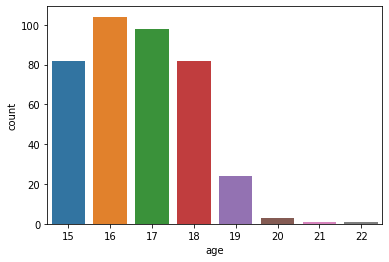

In [14]:
primary_analysis('age')

In [15]:
math['age'] = math['age'].apply(lambda x: 19 if x > 19 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='age', ylabel='count'>

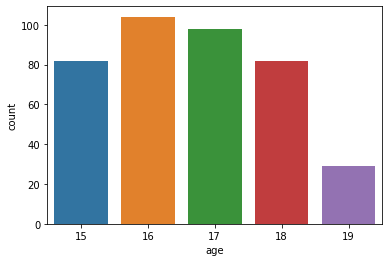

In [16]:
sns.countplot(x='age',data=math)

# 2.4. math.address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(U    295
 R     83
 Name: address, dtype: int64,
 None,
 array(['U', None, 'R'], dtype=object),
 count     378
 unique      2
 top         U
 freq      295
 Name: address, dtype: object)

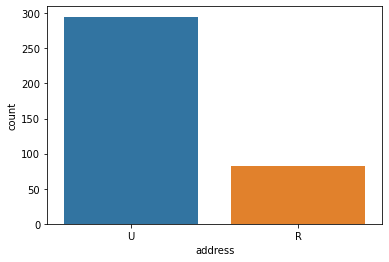

In [17]:
primary_analysis('address')

# 2.5. math.famsize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(GT3    261
 LE3    107
 Name: famsize, dtype: int64,
 None,
 array([None, 'GT3', 'LE3'], dtype=object),
 count     368
 unique      2
 top       GT3
 freq      261
 Name: famsize, dtype: object)

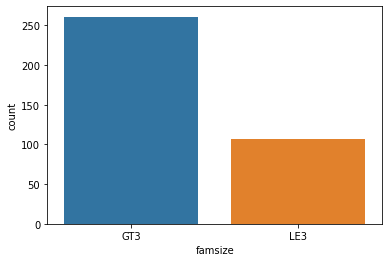

In [18]:
primary_analysis('famsize')

# 2.6. math.p_status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(T    314
 A     36
 Name: p_status, dtype: int64,
 None,
 array(['A', None, 'T'], dtype=object),
 count     350
 unique      2
 top         T
 freq      314
 Name: p_status, dtype: object)

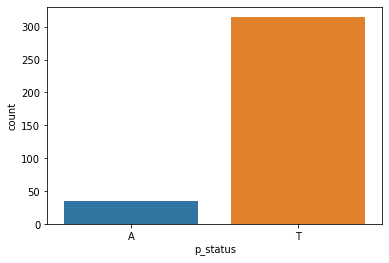

In [19]:
primary_analysis('p_status')

# 2.7. math.m_edu       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(4.0    131
 2.0    102
 3.0     97
 1.0     59
 0.0      3
 Name: m_edu, dtype: int64,
 None,
 array([ 4.,  1.,  3.,  2., nan,  0.]),
 count    392.000000
 mean       2.750000
 std        1.098127
 min        0.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        4.000000
 Name: m_edu, dtype: float64)

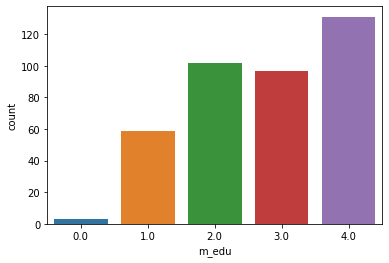

In [20]:
primary_analysis('m_edu')

In [21]:
math['m_edu'] = math['m_edu'].apply(lambda x: 1 if x < 1 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='m_edu', ylabel='count'>

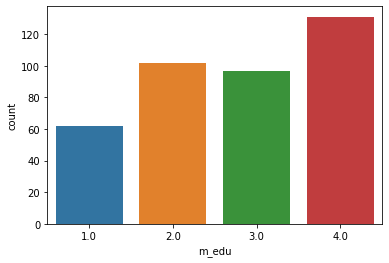

In [22]:
sns.countplot(x='m_edu',data=math)

# 2.8. math.f_edu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(2.0     106
 3.0      96
 4.0      88
 1.0      78
 0.0       2
 40.0      1
 Name: f_edu, dtype: int64,
 None,
 array([ 4.,  1.,  2.,  3., 40., nan,  0.]),
 count    371.000000
 mean       2.614555
 std        2.228732
 min        0.000000
 25%        2.000000
 50%        2.000000
 75%        3.000000
 max       40.000000
 Name: f_edu, dtype: float64)

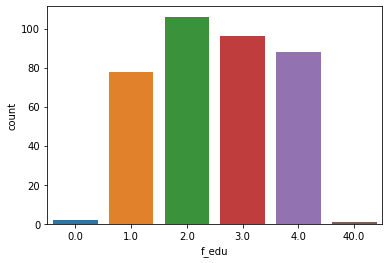

In [23]:
primary_analysis('f_edu')

In [24]:
math.loc[11, 'f_edu'] = 4.0 #outlier

In [25]:
math['f_edu'] = math['f_edu'].apply(lambda x: 1 if x < 1 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='f_edu', ylabel='count'>

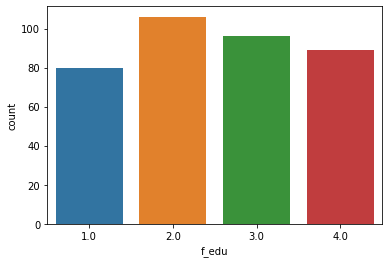

In [26]:
sns.countplot(x='f_edu',data=math)

# 2.9. math.m_job 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(other       133
 services     98
 at_home      58
 teacher      55
 health       32
 Name: m_job, dtype: int64,
 None,
 array(['at_home', 'health', 'other', 'services', 'teacher', None],
       dtype=object),
 count       376
 unique        5
 top       other
 freq        133
 Name: m_job, dtype: object)

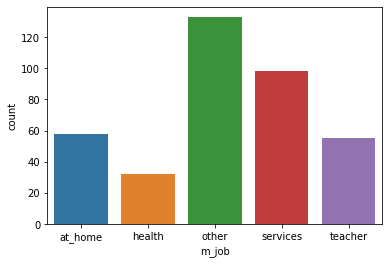

In [27]:
primary_analysis('m_job')

# 2.10. math.f_job

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(other       197
 services    102
 teacher      29
 at_home      16
 health       15
 Name: f_job, dtype: int64,
 None,
 array(['teacher', 'other', None, 'health', 'services', 'at_home'],
       dtype=object),
 count       359
 unique        5
 top       other
 freq        197
 Name: f_job, dtype: object)

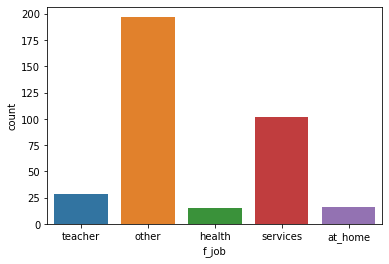

In [28]:
primary_analysis('f_job')

# 2.11. math.reason

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(course        137
 home          104
 reputation    103
 other          34
 Name: reason, dtype: int64,
 None,
 array(['course', 'other', 'home', 'reputation', None], dtype=object),
 count        378
 unique         4
 top       course
 freq         137
 Name: reason, dtype: object)

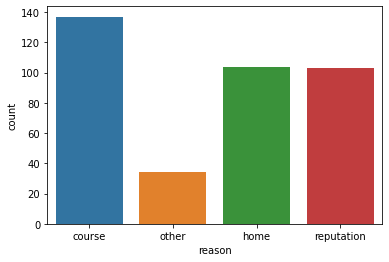

In [29]:
primary_analysis('reason')

# 2.12. math.guardian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(mother    250
 father     86
 other      28
 Name: guardian, dtype: int64,
 None,
 array(['mother', 'father', 'other', None], dtype=object),
 count        364
 unique         3
 top       mother
 freq         250
 Name: guardian, dtype: object)

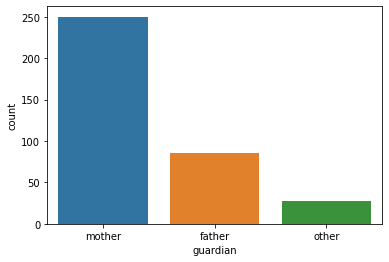

In [30]:
primary_analysis('guardian')

In [31]:
math['guardian'] = math['guardian'].apply(lambda x: 'other' if x == 'father' else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='guardian', ylabel='count'>

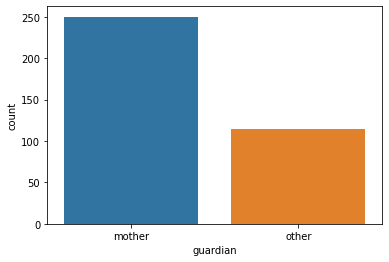

In [32]:
sns.countplot(x='guardian',data=math)

# 2.13. math.traveltime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(1.0    242
 2.0     96
 3.0     22
 4.0      7
 Name: traveltime, dtype: int64,
 None,
 array([ 2.,  1.,  3., nan,  4.]),
 count    367.000000
 mean       1.438692
 std        0.694181
 min        1.000000
 25%        1.000000
 50%        1.000000
 75%        2.000000
 max        4.000000
 Name: traveltime, dtype: float64)

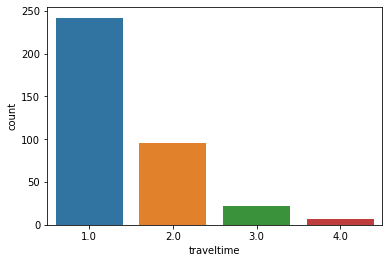

In [33]:
primary_analysis('traveltime')

In [34]:
math['traveltime'] = math['traveltime'].apply(lambda x: 3 if x > 3 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='traveltime', ylabel='count'>

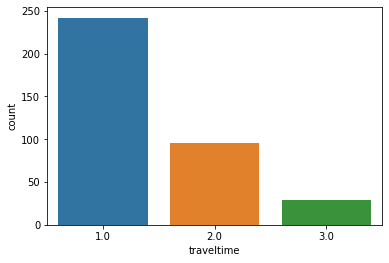

In [35]:
sns.countplot(x='traveltime',data=math)

# 2.14. math.studytime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(2.0    194
 1.0    103
 3.0     64
 4.0     27
 Name: studytime, dtype: int64,
 None,
 array([ 2.,  3.,  1., nan,  4.]),
 count    388.000000
 mean       2.038660
 std        0.842078
 min        1.000000
 25%        1.000000
 50%        2.000000
 75%        2.000000
 max        4.000000
 Name: studytime, dtype: float64)

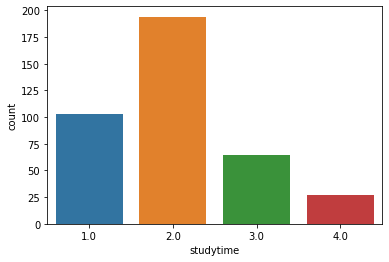

In [36]:
primary_analysis('studytime')

In [37]:
math['studytime'] = math['studytime'].apply(lambda x: 3 if x > 3 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='studytime', ylabel='count'>

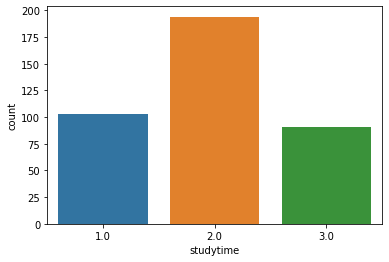

In [38]:
sns.countplot(x='studytime',data=math)

# 2.15. math.failures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(0.0    293
 1.0     49
 2.0     16
 3.0     15
 Name: failures, dtype: int64,
 None,
 array([ 0.,  3., nan,  2.,  1.]),
 count    373.000000
 mean       0.337802
 std        0.743135
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        3.000000
 Name: failures, dtype: float64)

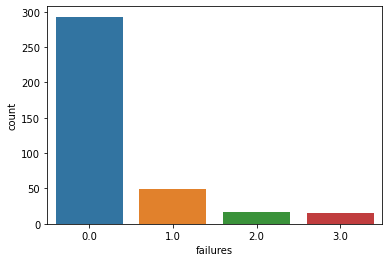

In [39]:
primary_analysis('failures')

In [40]:
math['failures'] = math['failures'].apply(lambda x: 1 if x > 1 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='failures', ylabel='count'>

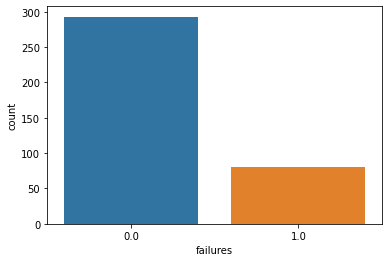

In [41]:
sns.countplot(x='failures',data=math)

# 2.16. math.schoolsup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(no     335
 yes     51
 Name: schoolsup, dtype: int64,
 None,
 array(['yes', 'no', None], dtype=object),
 count     386
 unique      2
 top        no
 freq      335
 Name: schoolsup, dtype: object)

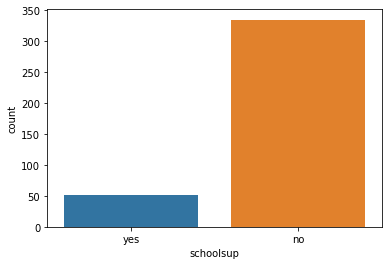

In [42]:
primary_analysis('schoolsup')

# 2.17. math.famsup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(yes    219
 no     137
 Name: famsup, dtype: int64,
 None,
 array(['no', 'yes', None], dtype=object),
 count     356
 unique      2
 top       yes
 freq      219
 Name: famsup, dtype: object)

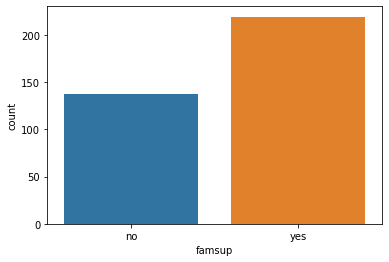

In [43]:
primary_analysis('famsup')

# 2.18. math.paid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(no     200
 yes    155
 Name: paid, dtype: int64,
 None,
 array(['no', None, 'yes'], dtype=object),
 count     355
 unique      2
 top        no
 freq      200
 Name: paid, dtype: object)

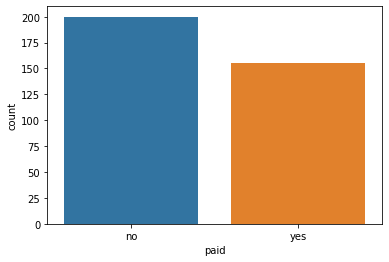

In [44]:
primary_analysis('paid')

# 2.19. math.activities

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(yes    195
 no     186
 Name: activities, dtype: int64,
 None,
 array(['no', 'yes', None], dtype=object),
 count     381
 unique      2
 top       yes
 freq      195
 Name: activities, dtype: object)

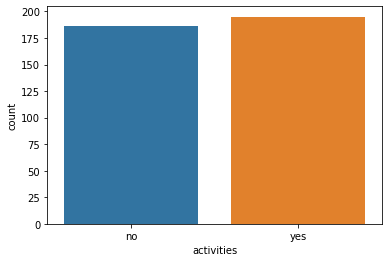

In [45]:
primary_analysis('activities')

# 2.20. math.nursery

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(yes    300
 no      79
 Name: nursery, dtype: int64,
 None,
 array(['yes', 'no', None], dtype=object),
 count     379
 unique      2
 top       yes
 freq      300
 Name: nursery, dtype: object)

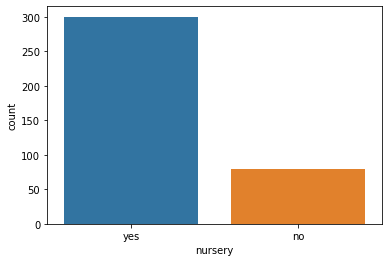

In [46]:
primary_analysis('nursery')

# 2.21. math.studytime_gr

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   studytime_gr  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(-6.0     194
 -3.0     103
 -9.0      64
 -12.0     27
 Name: studytime_gr, dtype: int64,
 None,
 array([ -6.,  -9.,  -3.,  nan, -12.]),
 count    388.000000
 mean      -6.115979
 std        2.526235
 min      -12.000000
 25%       -6.000000
 50%       -6.000000
 75%       -3.000000
 max       -3.000000
 Name: studytime_gr, dtype: float64)

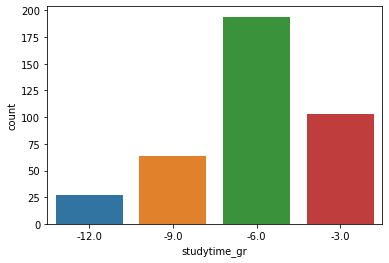

In [47]:
primary_analysis('studytime_gr') 

# 2.22. math.higher

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(yes    356
 no      19
 Name: higher, dtype: int64,
 None,
 array(['yes', None, 'no'], dtype=object),
 count     375
 unique      2
 top       yes
 freq      356
 Name: higher, dtype: object)

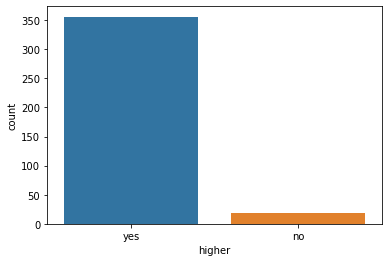

In [48]:
primary_analysis('higher')

# 2.23. math.internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(yes    305
 no      56
 Name: internet, dtype: int64,
 None,
 array([None, 'yes', 'no'], dtype=object),
 count     361
 unique      2
 top       yes
 freq      305
 Name: internet, dtype: object)

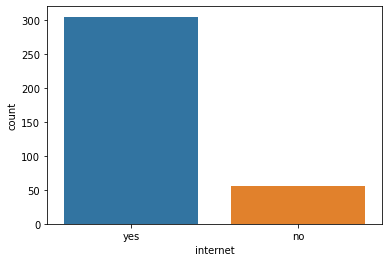

In [49]:
primary_analysis('internet')

# 2.24. math_romantic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(no     240
 yes    124
 Name: romantic, dtype: int64,
 None,
 array(['no', None, 'yes'], dtype=object),
 count     364
 unique      2
 top        no
 freq      240
 Name: romantic, dtype: object)

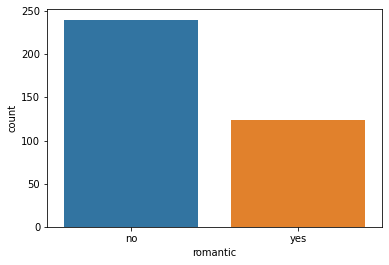

In [50]:
primary_analysis('romantic')

# 2.25. math.famrel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


( 4.0    182
  5.0     99
  3.0     62
  2.0     17
  1.0      7
 -1.0      1
 Name: famrel, dtype: int64,
 None,
 array([ 4.,  5.,  3., nan, -1.,  2.,  1.]),
 count    368.000000
 mean       3.937500
 std        0.927277
 min       -1.000000
 25%        4.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: famrel, dtype: float64)

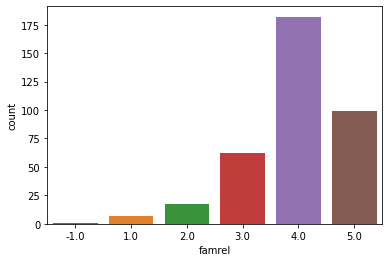

In [51]:
primary_analysis('famrel')

In [52]:
math[math['famrel']==-1] # must contain values from 1 to 5

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,None,2.0,2.0,services,services,home,mother,1.0,1.0,1.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [53]:
math.loc[25, ['famrel']] = None

In [54]:
math['famrel'] = math['famrel'].apply(lambda x: 3 if x < 3 else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='famrel', ylabel='count'>

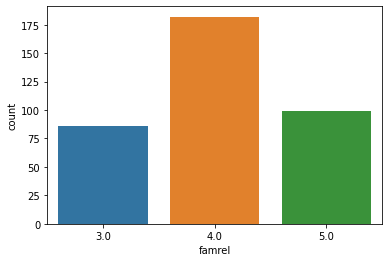

In [55]:
sns.countplot(x='famrel',data=math)

# 2.26. math.freetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(3.0    153
 4.0    112
 2.0     63
 5.0     38
 1.0     18
 Name: freetime, dtype: int64,
 None,
 array([ 3.,  2.,  4.,  1.,  5., nan]),
 count    384.000000
 mean       3.231771
 std        0.993940
 min        1.000000
 25%        3.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: freetime, dtype: float64)

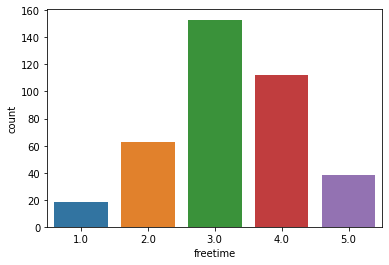

In [56]:
primary_analysis('freetime')

In [57]:
math['freetime'] = math['freetime'].apply(lambda x: 2 if x < 2
                                        else 4 if x > 4
                                        else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='freetime', ylabel='count'>

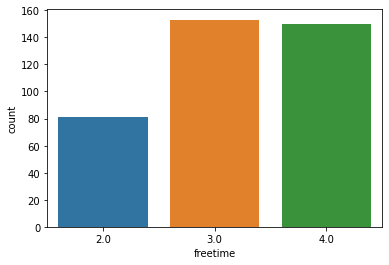

In [58]:
sns.countplot(x='freetime',data=math)

# 2.27. math.goout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(3.0    127
 2.0    101
 4.0     84
 5.0     52
 1.0     23
 Name: goout, dtype: int64,
 None,
 array([ 4.,  3.,  2.,  1.,  5., nan]),
 count    387.000000
 mean       3.105943
 std        1.115896
 min        1.000000
 25%        2.000000
 50%        3.000000
 75%        4.000000
 max        5.000000
 Name: goout, dtype: float64)

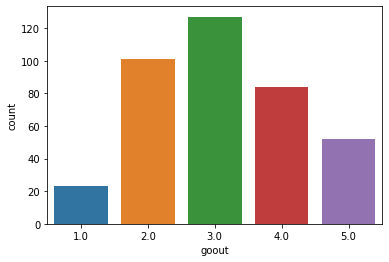

In [59]:
primary_analysis('goout')

In [60]:
math['goout'] = math['goout'].apply(lambda x: 2 if x < 2
                                        else 4 if x > 4
                                        else x) #enlargement of a feature for further analysis

<AxesSubplot:xlabel='goout', ylabel='count'>

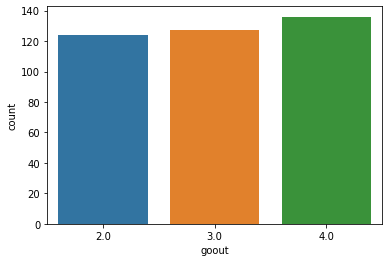

In [61]:
sns.countplot(x='goout',data=math)

# 2.28. math.health

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(5.0    138
 3.0     89
 4.0     63
 1.0     47
 2.0     43
 Name: health, dtype: int64,
 None,
 array([ 3.,  5.,  1.,  2.,  4., nan]),
 count    380.000000
 mean       3.531579
 std        1.396019
 min        1.000000
 25%        3.000000
 50%        4.000000
 75%        5.000000
 max        5.000000
 Name: health, dtype: float64)

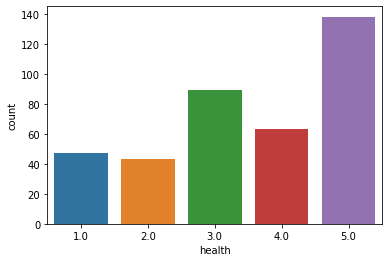

In [62]:
primary_analysis('health')

# 2.29. math.absences

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


(0.0      111
 2.0       60
 4.0       53
 6.0       31
 8.0       21
 10.0      17
 12.0      12
 14.0      12
 3.0        8
 16.0       7
 7.0        6
 5.0        5
 18.0       5
 20.0       4
 22.0       3
 9.0        3
 1.0        3
 15.0       2
 13.0       2
 11.0       2
 25.0       1
 54.0       1
 385.0      1
 26.0       1
 56.0       1
 24.0       1
 212.0      1
 21.0       1
 75.0       1
 30.0       1
 19.0       1
 38.0       1
 40.0       1
 23.0       1
 17.0       1
 28.0       1
 Name: absences, dtype: int64,
 None,
 array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
         12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
         22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
         40.,  23.,  17., 212.]),
 count    383.000000
 mean       7.279373
 std       23.465197
 min        0.000000
 25%        0.000000
 50%        4.000000
 75%        8.000000
 max      385.000000
 Name: absences, dtype: float64)

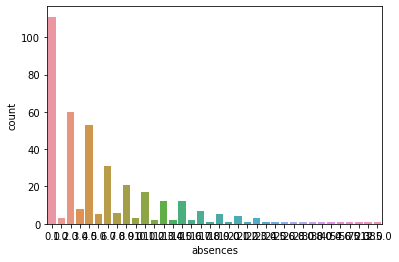

In [63]:
primary_analysis('absences')

In [64]:
math = math.loc[math.absences <= 75] # without extreme outliners

<AxesSubplot:>

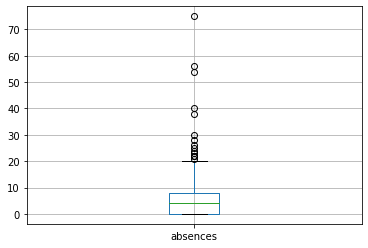

In [65]:
math.boxplot(column='absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


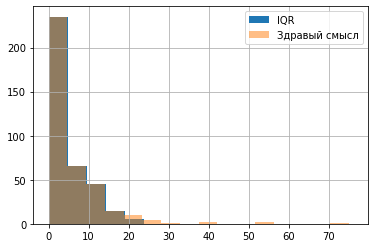

In [66]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
math.absences.loc[math.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (0, 76), label = 'IQR')
 
math.absences.loc[math.absences <= 75].hist(
alpha = 0.5, bins = 16, range = (0, 75), label = 'Здравый смысл')
 
plt.legend();


In [67]:
math = math.loc[math.absences <= 20] # without most outliners

In [68]:
math['absences'].fillna(value=math.absences.mean(), inplace=True) #?

<AxesSubplot:>

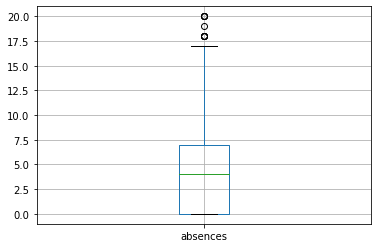

In [69]:
math.boxplot(column='absences')

<AxesSubplot:xlabel='absences', ylabel='count'>

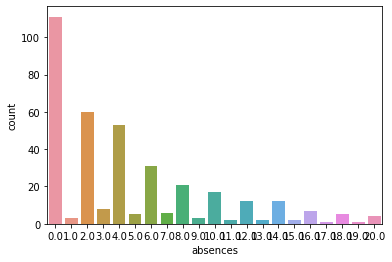

In [70]:
sns.countplot(x='absences',data=math)

# 2.30. math.score

In [71]:
math.loc[:, ['score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 15.7 KB


In [72]:
math['score'].value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

In [73]:
math['score'].unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan])

In [74]:
math['score'].describe() 

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [75]:
math[math['score'].isna()]

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,None,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,None,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,4.0,NaN,4.0,3.0,NaN
350,MS,M,19,None,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,1.0,no,no,no,no,None,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [76]:
math.dropna(subset=['score'], inplace=True) #there should be no NaN values in the predicted value

In [77]:
math['score'].unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.])

<AxesSubplot:>

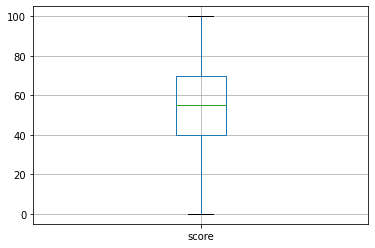

In [78]:
math.boxplot(column='score')

In [79]:
math['score'].value_counts()

50.0     53
55.0     42
0.0      36
75.0     31
65.0     30
60.0     29
70.0     27
40.0     26
45.0     23
80.0     16
30.0     14
35.0      9
90.0      9
25.0      7
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

## 3. Analysis

## 3.1. Correlation analysis

In [80]:
prepared_math = math.dropna(thresh=15)

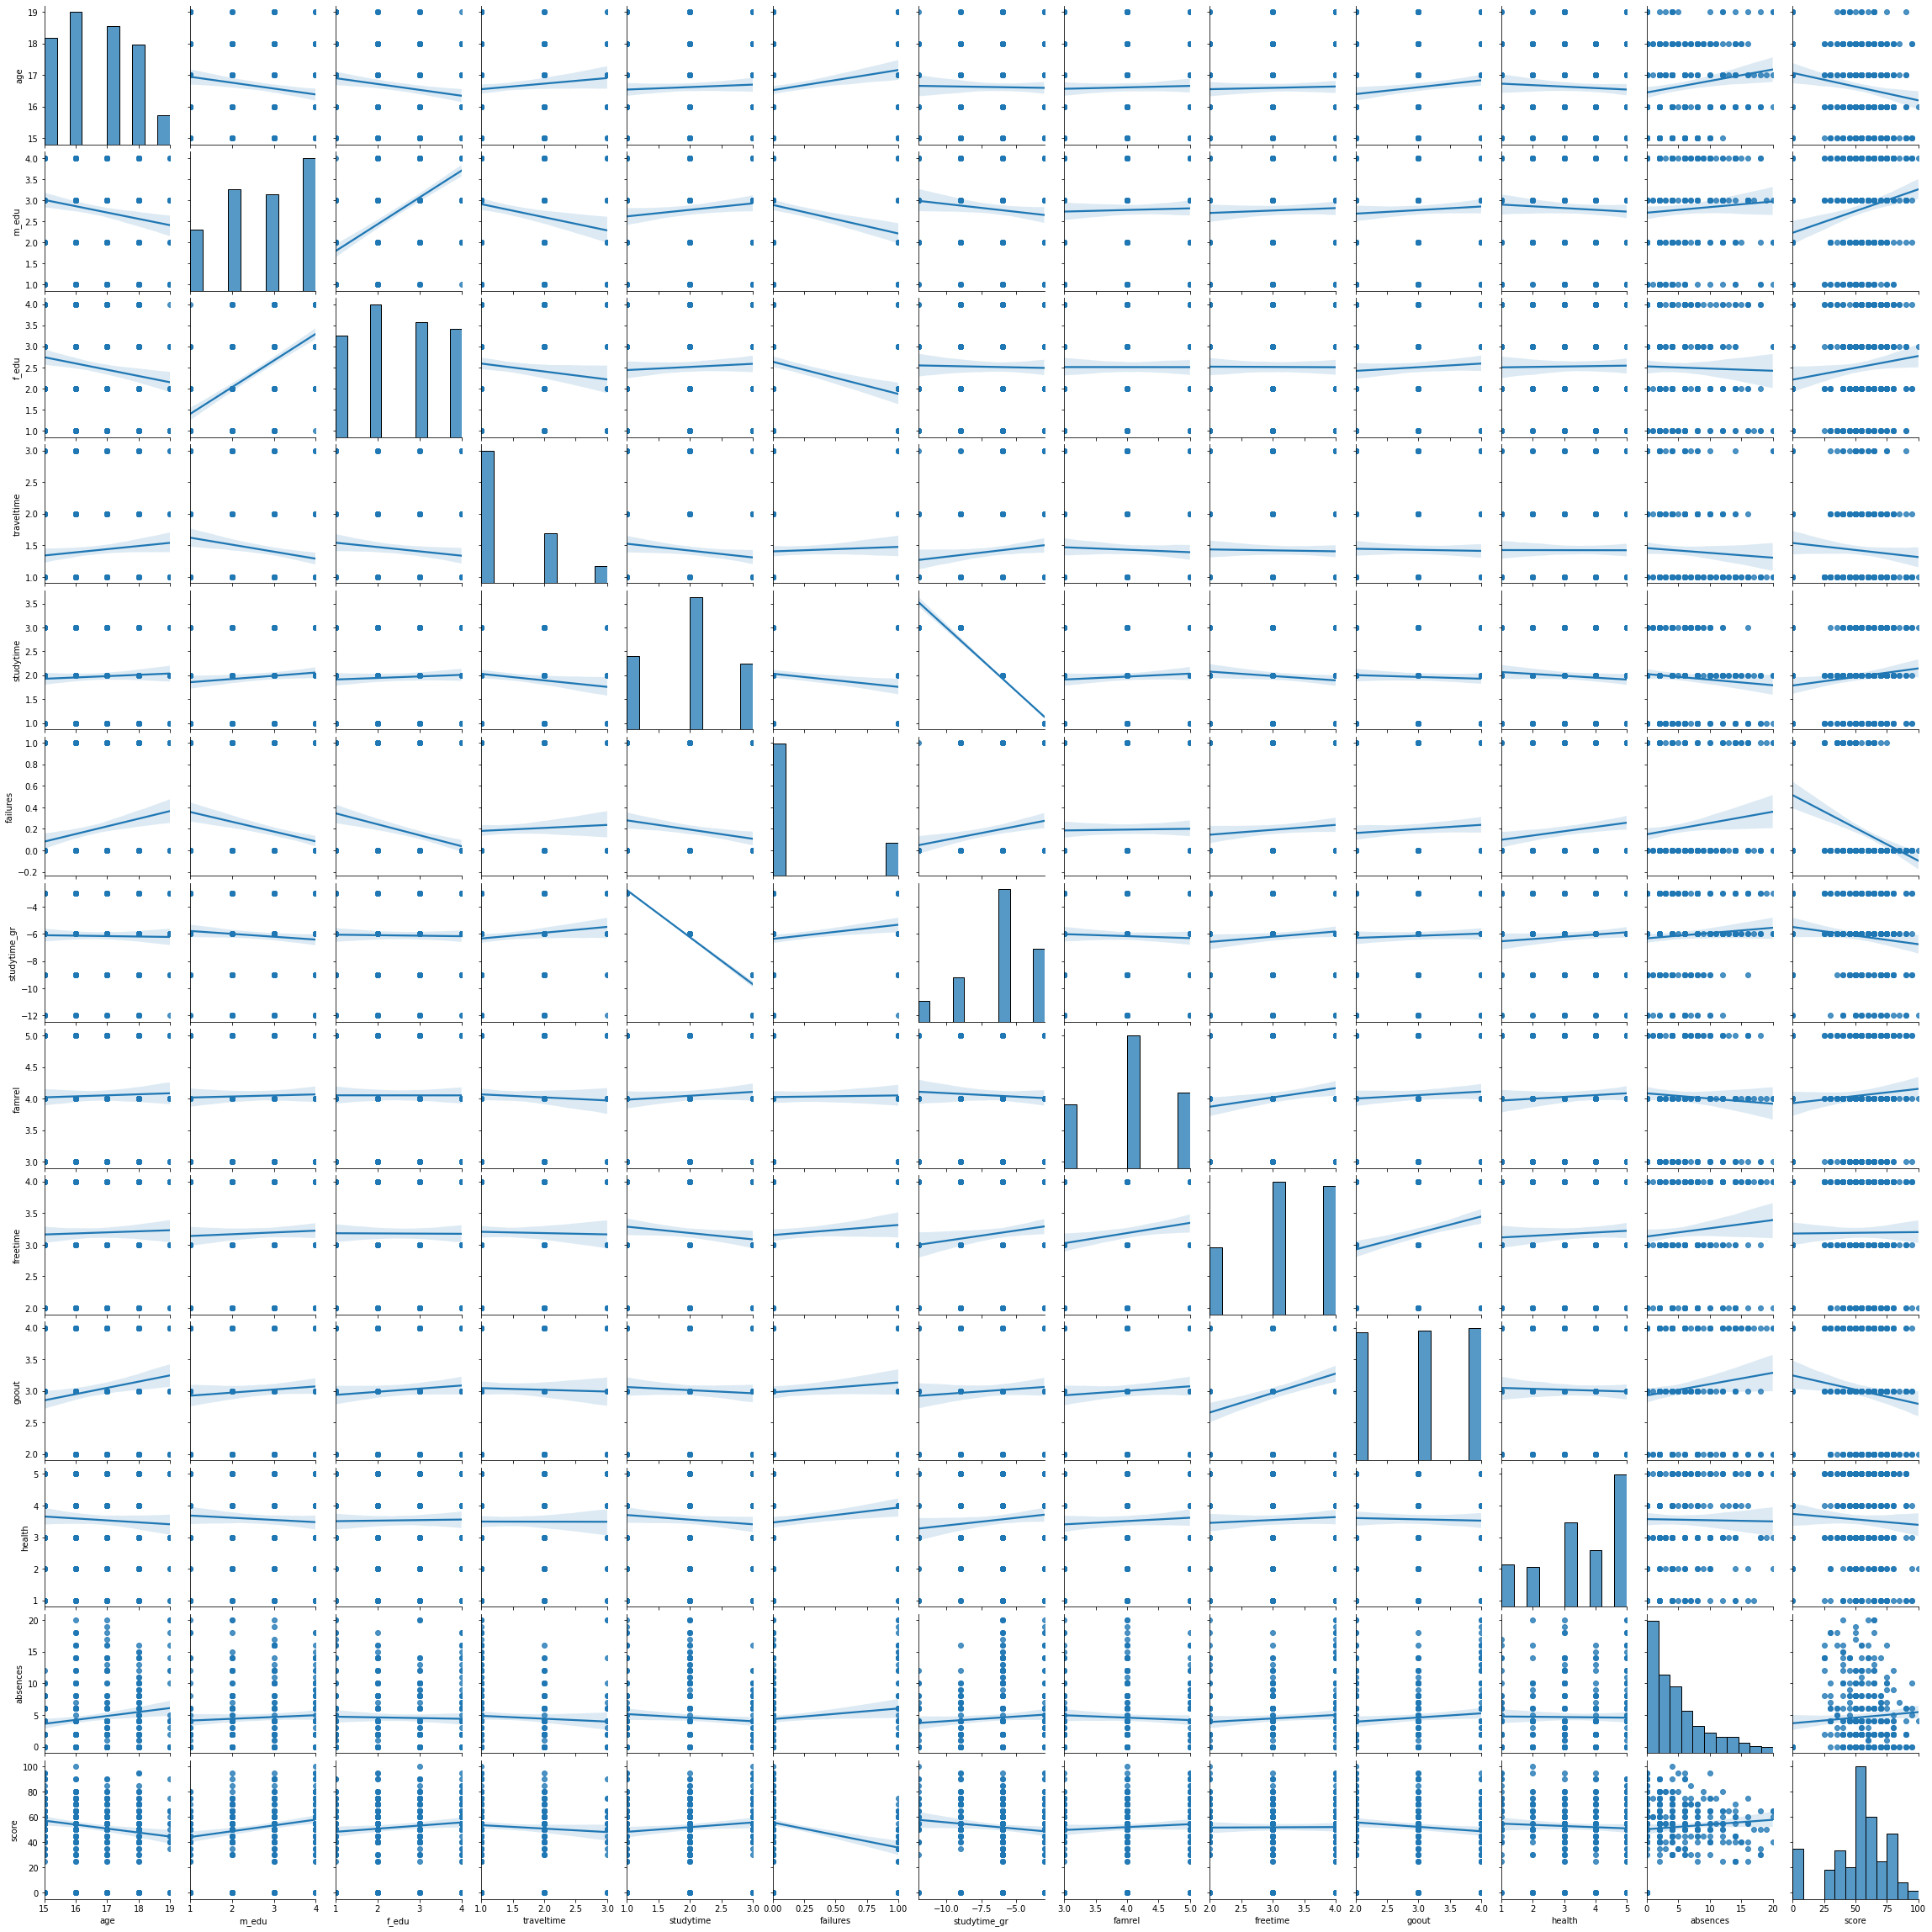

In [81]:
sns.pairplot(math, kind = 'reg')

In [82]:
math.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_gr,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167465,-0.166102,0.093879,0.046395,0.213381,-0.014966,0.027223,0.026913,0.146883,-0.053475,0.150590,-0.165584
m_edu,-0.167465,1.000000,0.635373,-0.186169,0.102149,-0.249352,-0.088872,0.025263,0.040274,0.064601,-0.053959,0.061379,0.217985
f_edu,-0.166102,0.635373,1.000000,-0.113409,0.049055,-0.279358,-0.015765,-0.000623,-0.004507,0.065680,0.013247,-0.023997,0.117679
traveltime,0.093879,-0.186169,-0.113409,1.000000,-0.121143,0.044531,0.105297,-0.043261,-0.017589,-0.021607,-0.001541,-0.058773,-0.078056
studytime,0.046395,0.102149,0.049055,-0.121143,1.000000,-0.153612,-0.959689,0.061695,-0.095904,-0.043350,-0.075823,-0.081235,0.115213
failures,0.213381,-0.249352,-0.279358,0.044531,-0.153612,1.000000,0.162293,0.014138,0.085552,0.077184,0.137708,0.133029,-0.348686
studytime_gr,-0.014966,-0.088872,-0.015765,0.105297,-0.959689,0.162293,1.000000,-0.040657,0.110891,0.049816,0.089648,0.075454,-0.113113
famrel,0.027223,0.025263,-0.000623,-0.043261,0.061695,0.014138,-0.040657,1.000000,0.153725,0.062603,0.055047,-0.056310,0.072402
freetime,0.026913,0.040274,-0.004507,-0.017589,-0.095904,0.085552,0.110891,0.153725,1.000000,0.283309,0.049129,0.085291,0.007101
goout,0.146883,0.064601,0.065680,-0.021607,-0.043350,0.077184,0.049816,0.062603,0.283309,1.000000,-0.024228,0.109001,-0.126043


In [83]:
abs(math.corr())>0.7 
#One significant correlation was found. 

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_gr,famrel,freetime,goout,health,absences,score
age,True,False,False,False,False,False,False,False,False,False,False,False,False
m_edu,False,True,False,False,False,False,False,False,False,False,False,False,False
f_edu,False,False,True,False,False,False,False,False,False,False,False,False,False
traveltime,False,False,False,True,False,False,False,False,False,False,False,False,False
studytime,False,False,False,False,True,False,True,False,False,False,False,False,False
failures,False,False,False,False,False,True,False,False,False,False,False,False,False
studytime_gr,False,False,False,False,True,False,True,False,False,False,False,False,False
famrel,False,False,False,False,False,False,False,True,False,False,False,False,False
freetime,False,False,False,False,False,False,False,False,True,False,False,False,False
goout,False,False,False,False,False,False,False,False,False,True,False,False,False


In [84]:
math.drop(['studytime_gr'], inplace=True, axis = 1)
#Eliminate column 'studytime_gr' 

## 3.2. Analysis of nominative variables

In [85]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')

In [86]:
list_nominative = 'school', 'sex', 'address', 'famsize', 'p_status','m_job', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic'

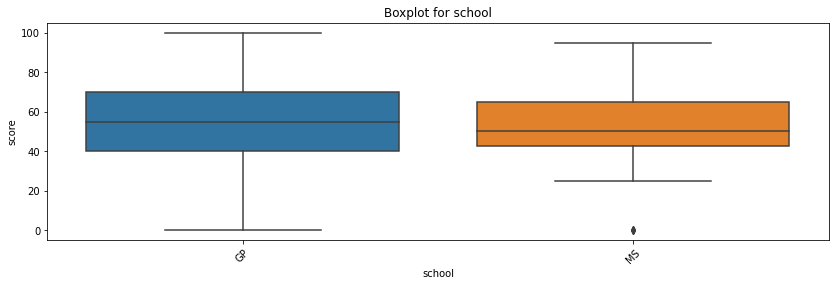

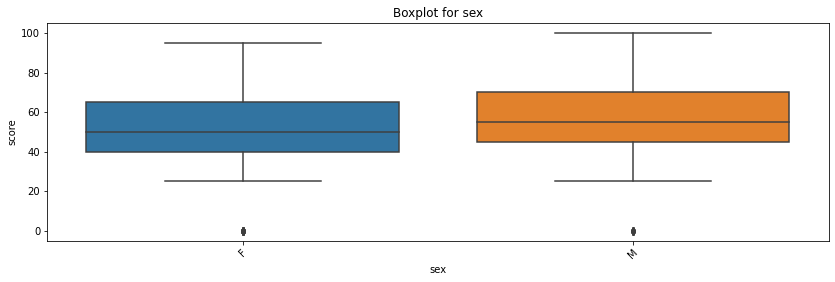

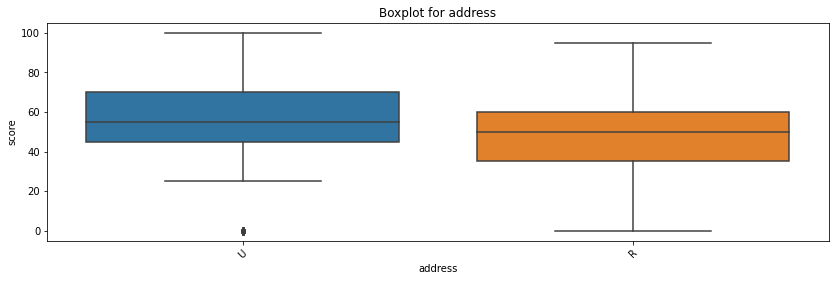

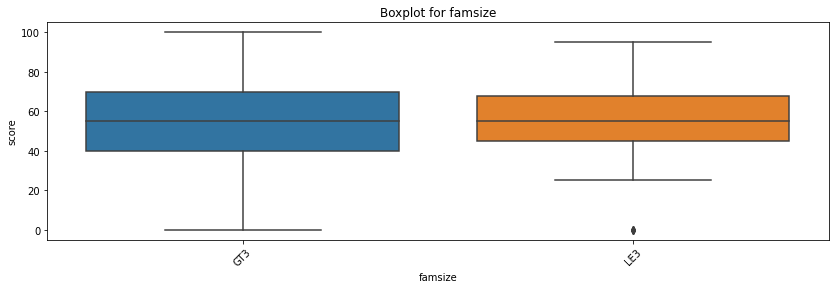

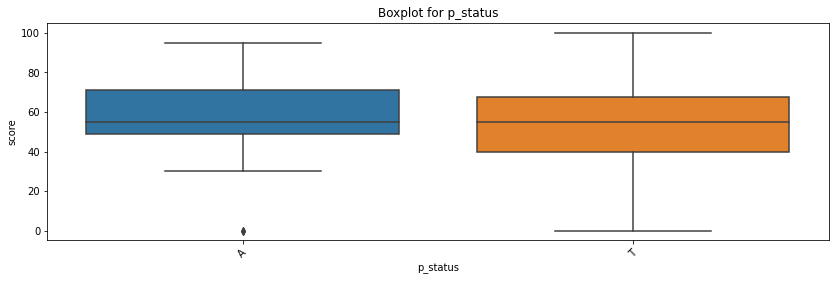

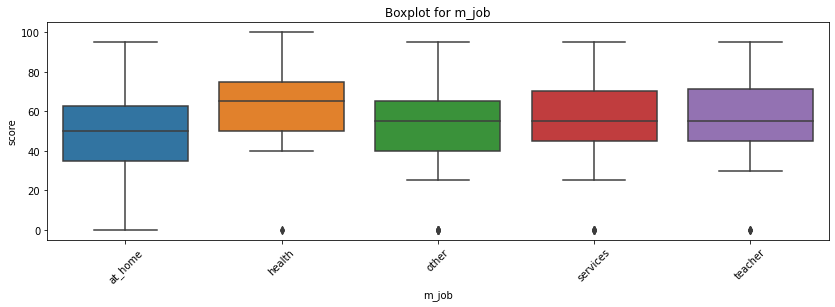

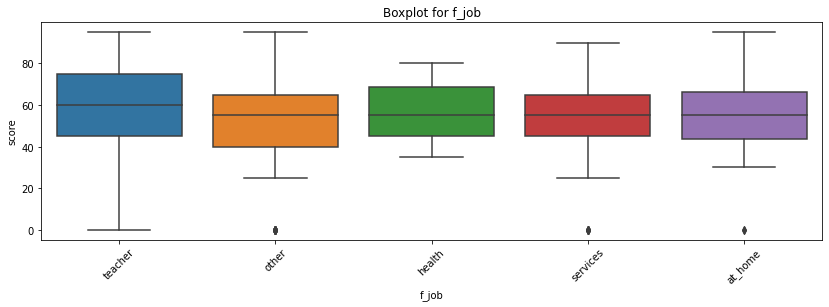

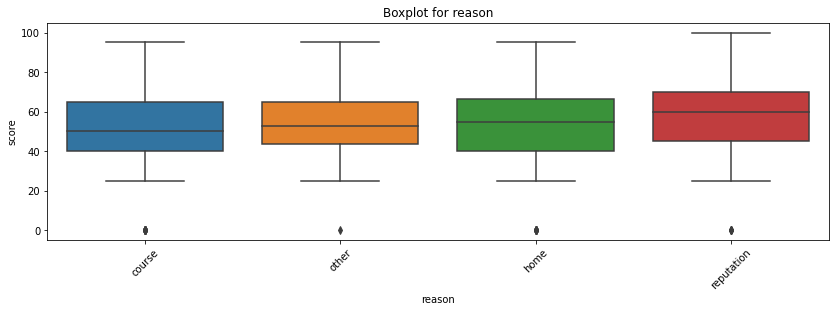

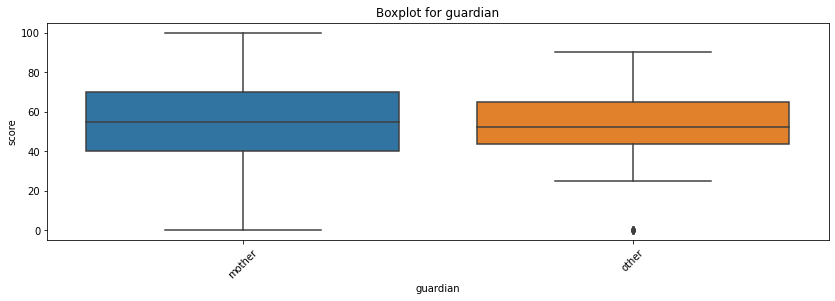

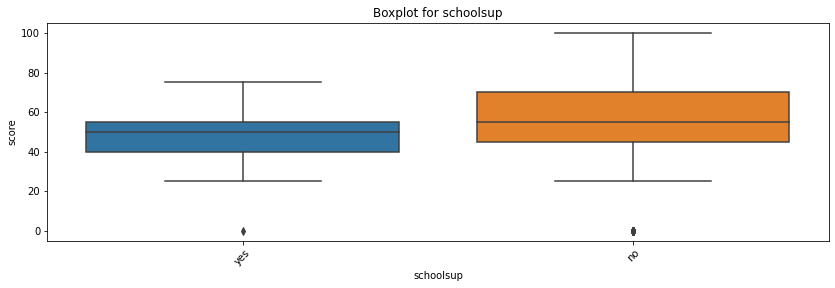

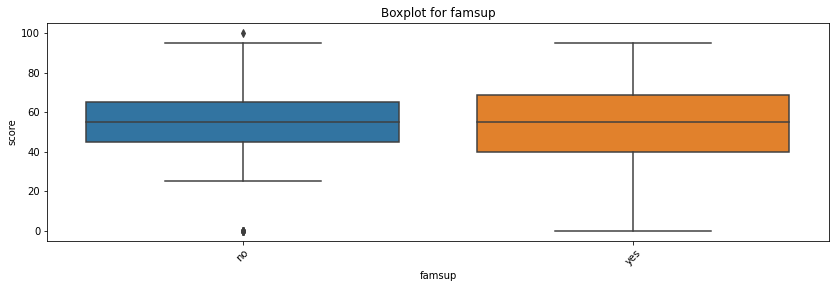

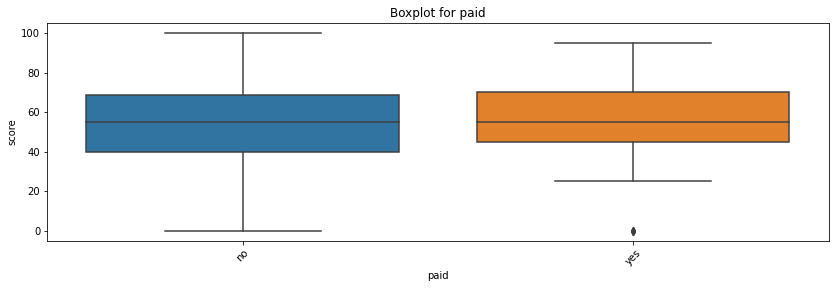

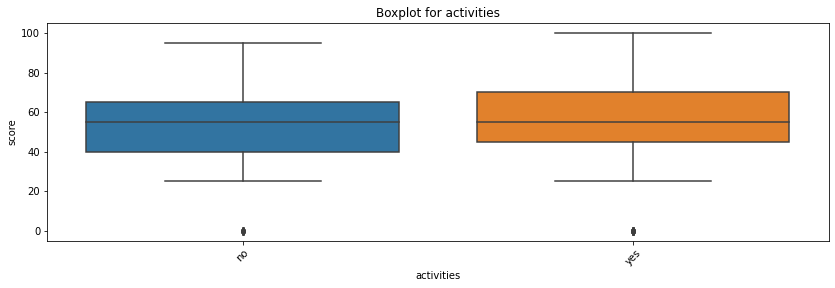

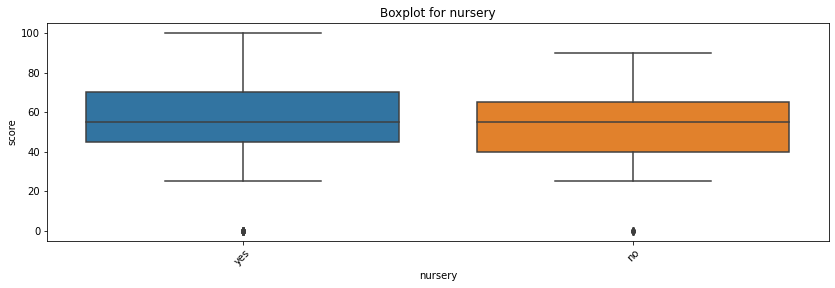

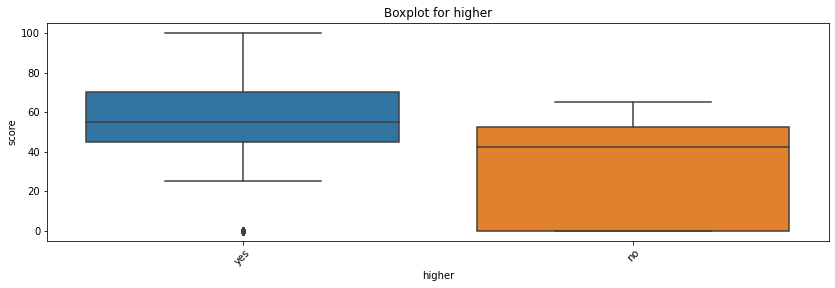

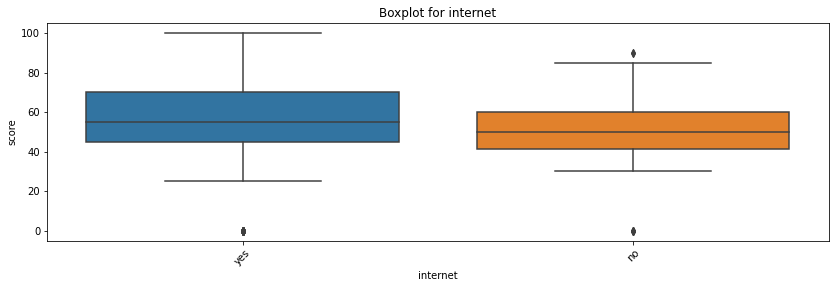

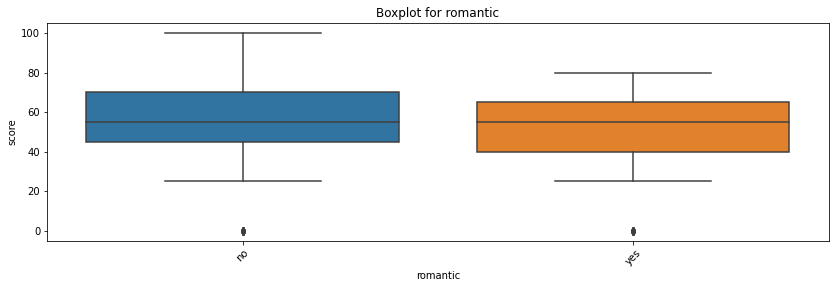

In [87]:
for col in list_nominative:
    get_boxplot(col)

In [88]:
for col in list_nominative:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [89]:
math.drop(['school', 'famsize', 'p_status', 'f_job', 'reason', 'guardian','schoolsup', 'famsup', 'activities', 'nursery', 'internet'], inplace=True, axis = 1)

# 4. Final

In [90]:
math.head()

,sex,age,address,m_edu,f_edu,m_job,traveltime,studytime,failures,paid,higher,romantic,famrel,freetime,goout,health,absences,score
0,F,18,U,4.0,4.0,at_home,2.0,2.0,0.0,no,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,F,17,U,1.0,1.0,at_home,1.0,2.0,0.0,no,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,F,15,U,1.0,1.0,at_home,1.0,2.0,1.0,None,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,F,15,U,4.0,2.0,health,1.0,3.0,0.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,F,16,U,3.0,3.0,other,1.0,2.0,0.0,yes,yes,no,4.0,3.0,2.0,5.0,4.0,50.0


Conclusions:
- There are few empty values in the data.
- There are erroneous values out of range. Errors have been ruled out.
- To simplify the analysis and increase the expressiveness of information, the features were enlarged in columns: 'age', 'm_edu', 'f_edu', 'guardian', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime','goout'.
- NaN values of the "score" column are excluded from the dataset to improve the accuracy of the analysis.
- As a result of finding a high correlation between the columns "studytime" and "studytime_gr", the last column was excluded from the dataset to simplify the model.
- Parameters 'school', 'famsize', 'p_status', 'f_job', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'internet' excluded from the dataset due to the absence of statistically significant differences.
- For further construction of the model, it is advisable to use the parameters:'sex', 'age', 'address', 'm_edu', 'f_edu', 'm_job', 'traveltime', 'studytime', 'failures', 'paid', 'higher', 'romantic','famrel', 'freetime', 'goout', 'health', 'absences', 'score'.